In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
NWW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#22 NWW1.csv.csv")
NWW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#23 NWW2.csv.csv")
NWW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#24 NWW3.csv.csv")
NWW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#25 NWW4.csv.csv")
NWW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#26 NWW5.csv.csv")

In [3]:
#Loading the corresponding force data
force_NWW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#22 NWW1.log" , delimiter = "\t")
force_NWW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#23 NWW2.log" , delimiter = "\t")
force_NWW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#24 NWW3.log" , delimiter = "\t")
force_NWW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#25 NWW4.log" , delimiter = "\t")
force_NWW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#26 NWW5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #22 - 26 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NWW1 = force_NWW1["Time"]
x_force_NWW2 = force_NWW2["Time"]
x_force_NWW3 = force_NWW3["Time"]
x_force_NWW4 = force_NWW4["Time"]
x_force_NWW5 = force_NWW5["Time"]

#force
Load_NWW1 = force_NWW1["Load"]
Load_NWW2 = force_NWW2["Load"]
Load_NWW3 = force_NWW3["Load"]
Load_NWW4 = force_NWW4["Load"]
Load_NWW5 = force_NWW5["Load"]

#plt.plot(x_force_NWW1,Load_NWW1,color = 'green', label = 'force data NWW1 test #2' )
#plt.plot(x_force_NE2,Load_NE2,color = 'blue', label = 'force data NE2 test #2' )
# plt.plot(x_force_NE3,Load_NE3,color = 'yellow', label = 'force data NE3 test #2' )
# plt.plot(x_force_NE4,Load_NE4,color = 'red', label = 'force data NE4 test #2' )
# plt.plot(x_force_NE5,Load_NE5,color = 'brown', label = 'force data NE5 test #2' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for NWW1


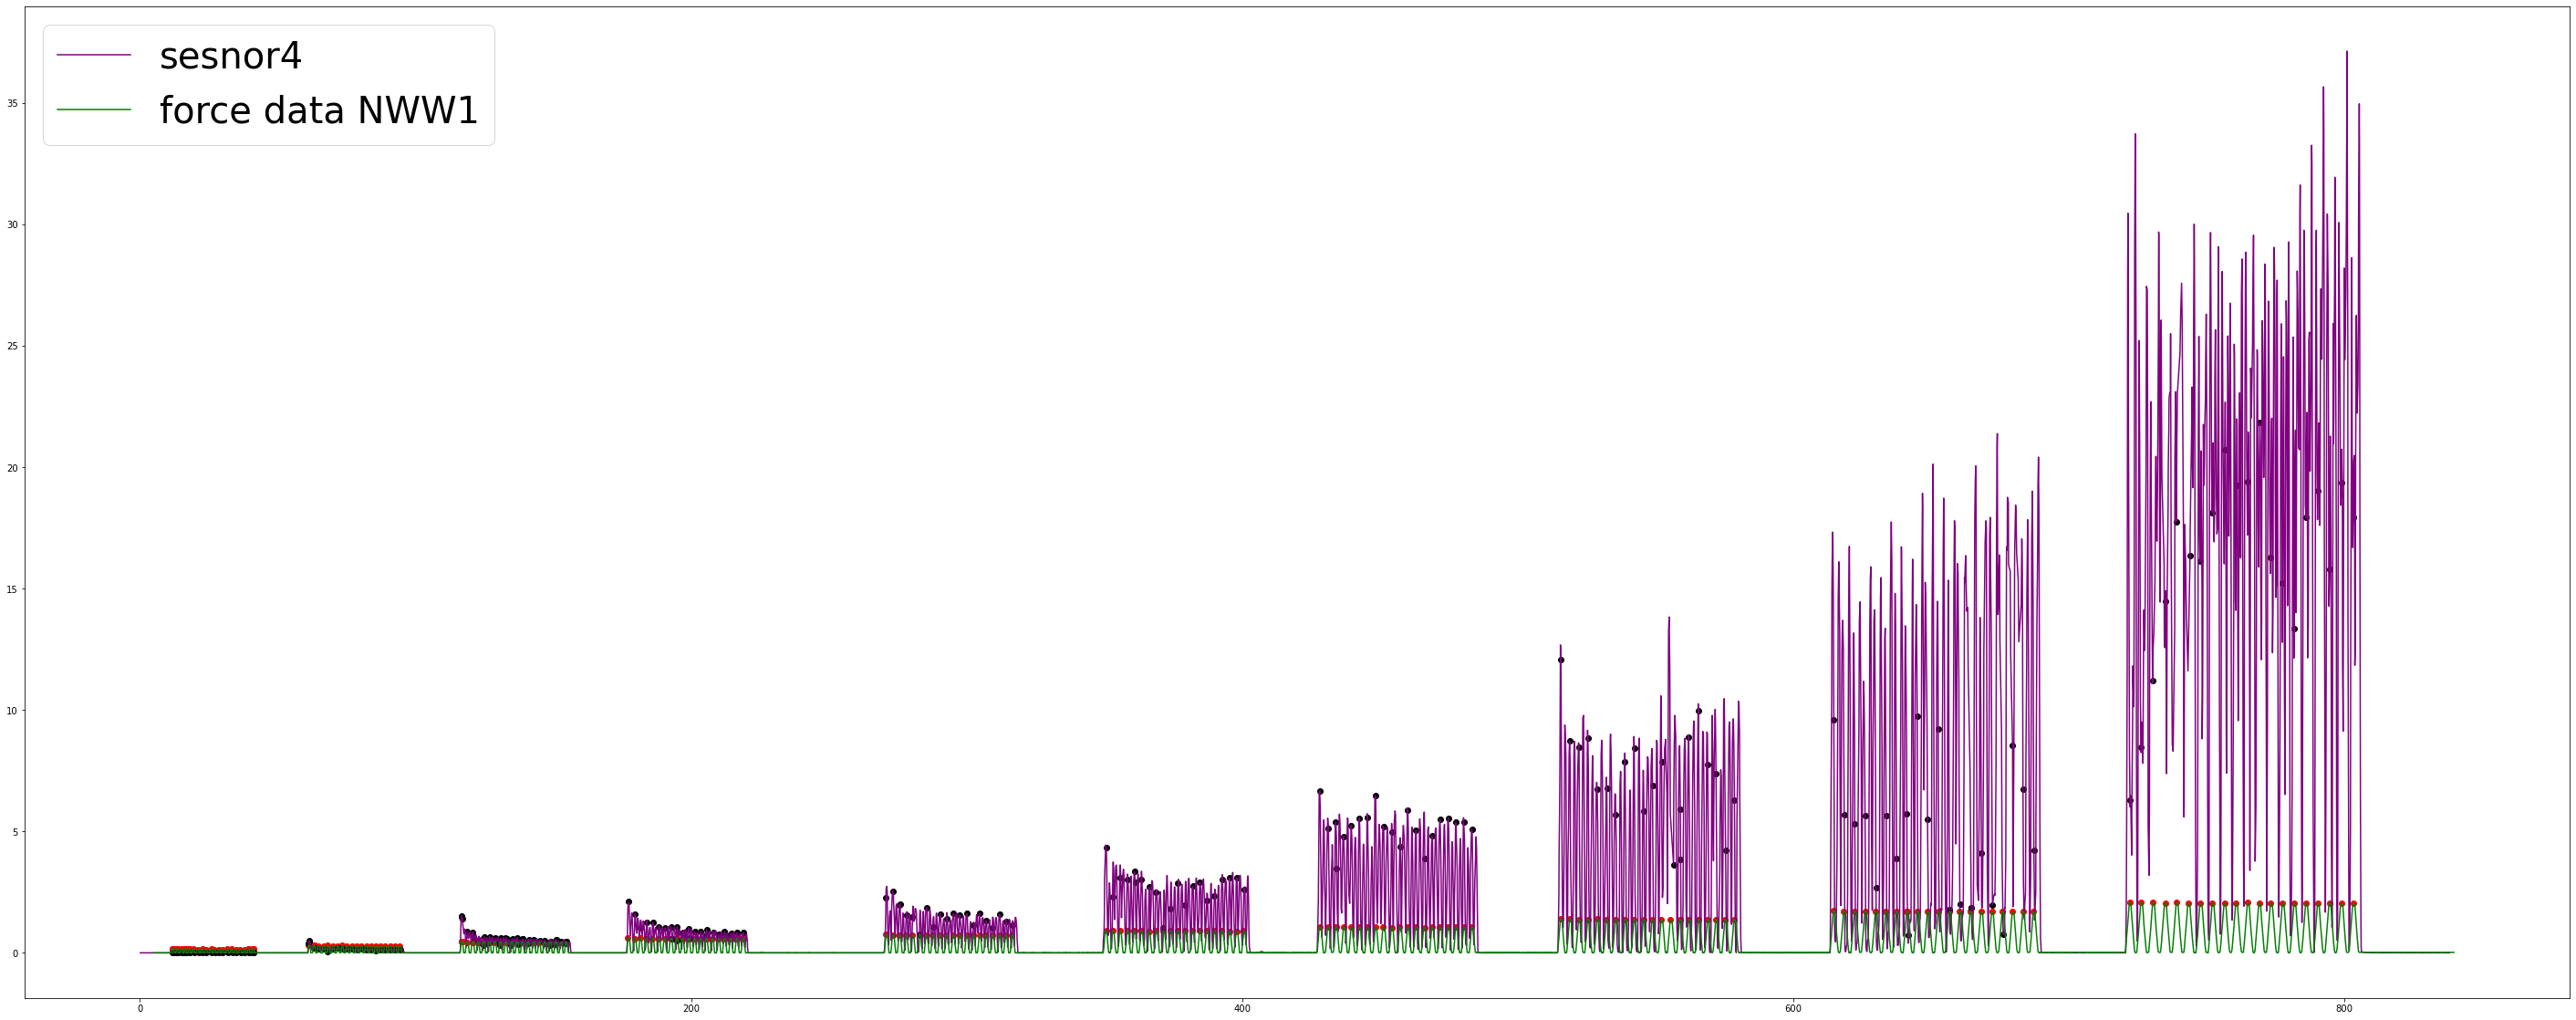

In [15]:
#visualizing the resistance data for each sensor NWW 1- 5 - NWW1

plt.figure(figsize=(50, 20))

# plt.plot(NWW1["Unnamed: 0"],NWW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s4_d"], color = 'purple', label = 'sesnor4')


scaled_x_force_NWW1 = x_force_NWW1 + 5
scaled_NWW1 = NWW1["Unnamed: 0"]

plt.plot(scaled_NWW1,NWW1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NWW1,Load_NWW1,color = 'green', label = 'force data NWW1')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NWW1")

#finding the peaks

pidx_Load_NWW1, _ = find_peaks(Load_NWW1,prominence= 0.05 )
peaks_Load_NWW1 = Load_NWW1[pidx_Load_NWW1]
peaks_Ltime_NWW1 = scaled_x_force_NWW1[pidx_Load_NWW1]

plt.scatter(peaks_Ltime_NWW1,peaks_Load_NWW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NWW1time = []

peaks_Ltime_NWW1.reset_index(drop = True, inplace = True)
peaks_Load_NWW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NWW1)):
    idx_NWW1time.append(bisect.bisect_left(NWW1["Unnamed: 0"], peaks_Ltime_NWW1[i]))

plt.scatter(NWW1["Unnamed: 0"][idx_NWW1time],NWW1["s4_d"][idx_NWW1time],color = 'black')

In [12]:
#Storing the peaks into csv file - NWW1
Load_NWW1peaks =[]

for i in range(len(peaks_Load_NWW1)):
    Load_NWW1peaks.append(peaks_Load_NWW1[i])
    
content_NWW1 = {'R1':NWW1["s1_d"][idx_NWW1time],
              'R2':NWW1["s2_d"][idx_NWW1time],
              'R3':NWW1["s3_d"][idx_NWW1time],
              'R4':NWW1["s4_d"][idx_NWW1time], 
              'Load': Load_NWW1peaks} 

df_NWW1 = pd.DataFrame(content_NWW1, columns = ['R1','R2','R3','R4','Load'])

df_NWW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NWW1.csv',index = False, header = True)

Sensor 4 is more profound for NWW2


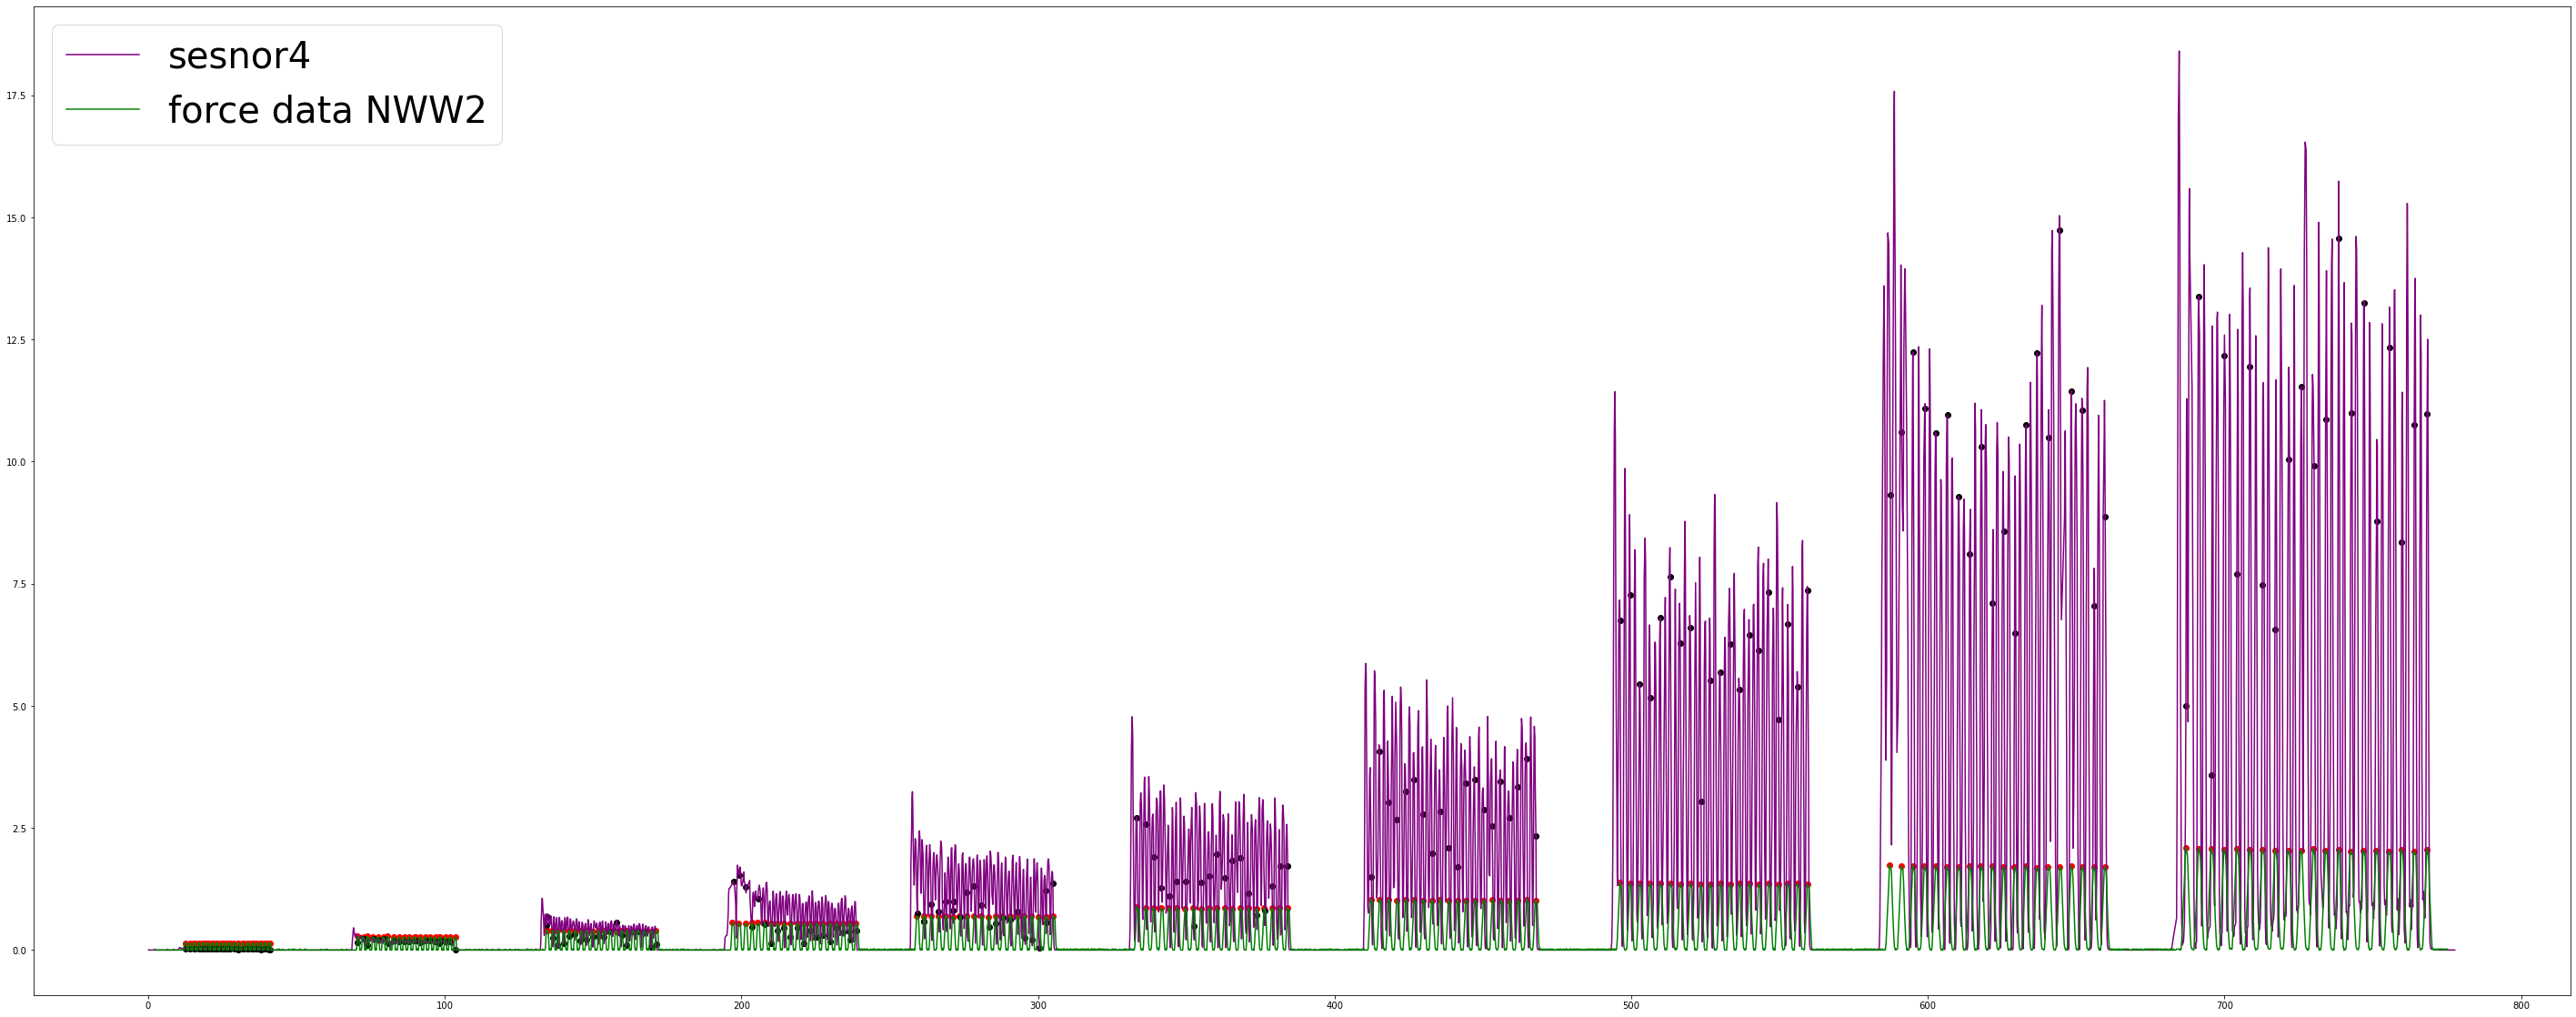

In [23]:
#visualizing the resistance data for each sensor NWW 1- 5 - NWW2

plt.figure(figsize=(50, 20))

# plt.plot(NWW2["Unnamed: 0"],NWW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NWW2["Unnamed: 0"],NWW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NWW2["Unnamed: 0"],NWW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NWW2["Unnamed: 0"],NWW2["s4_d"], color = 'purple', label = 'sesnor4')


scaled_x_force_NWW2 = x_force_NWW2 + 2.2
scaled_NWW2 = NWW2["Unnamed: 0"]

plt.plot(scaled_NWW2,NWW2["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NWW2,Load_NWW2,color = 'green', label = 'force data NWW2')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NWW2")

#finding the peaks

pidx_Load_NWW2, _ = find_peaks(Load_NWW2,prominence= 0.05 )
peaks_Load_NWW2 = Load_NWW2[pidx_Load_NWW2]
peaks_Ltime_NWW2 = scaled_x_force_NWW2[pidx_Load_NWW2]

plt.scatter(peaks_Ltime_NWW2,peaks_Load_NWW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NWW2time = []

peaks_Ltime_NWW2.reset_index(drop = True, inplace = True)
peaks_Load_NWW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NWW2)):
    idx_NWW2time.append(bisect.bisect_left(NWW2["Unnamed: 0"], peaks_Ltime_NWW2[i]))

plt.scatter(NWW2["Unnamed: 0"][idx_NWW2time],NWW2["s4_d"][idx_NWW2time],color = 'black')

In [24]:
#Storing the peaks into csv file - NWW2
Load_NWW2peaks =[]

for i in range(len(peaks_Load_NWW2)):
    Load_NWW2peaks.append(peaks_Load_NWW2[i])
    
content_NWW2 = {'R1':NWW2["s1_d"][idx_NWW2time],
              'R2':NWW2["s2_d"][idx_NWW2time],
              'R3':NWW2["s3_d"][idx_NWW2time],
              'R4':NWW2["s4_d"][idx_NWW2time], 
              'Load': Load_NWW2peaks} 

df_NWW2 = pd.DataFrame(content_NWW2, columns = ['R1','R2','R3','R4','Load'])

df_NWW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NWW2.csv',index = False, header = True)

Sensor 4 is more profound for NWW3


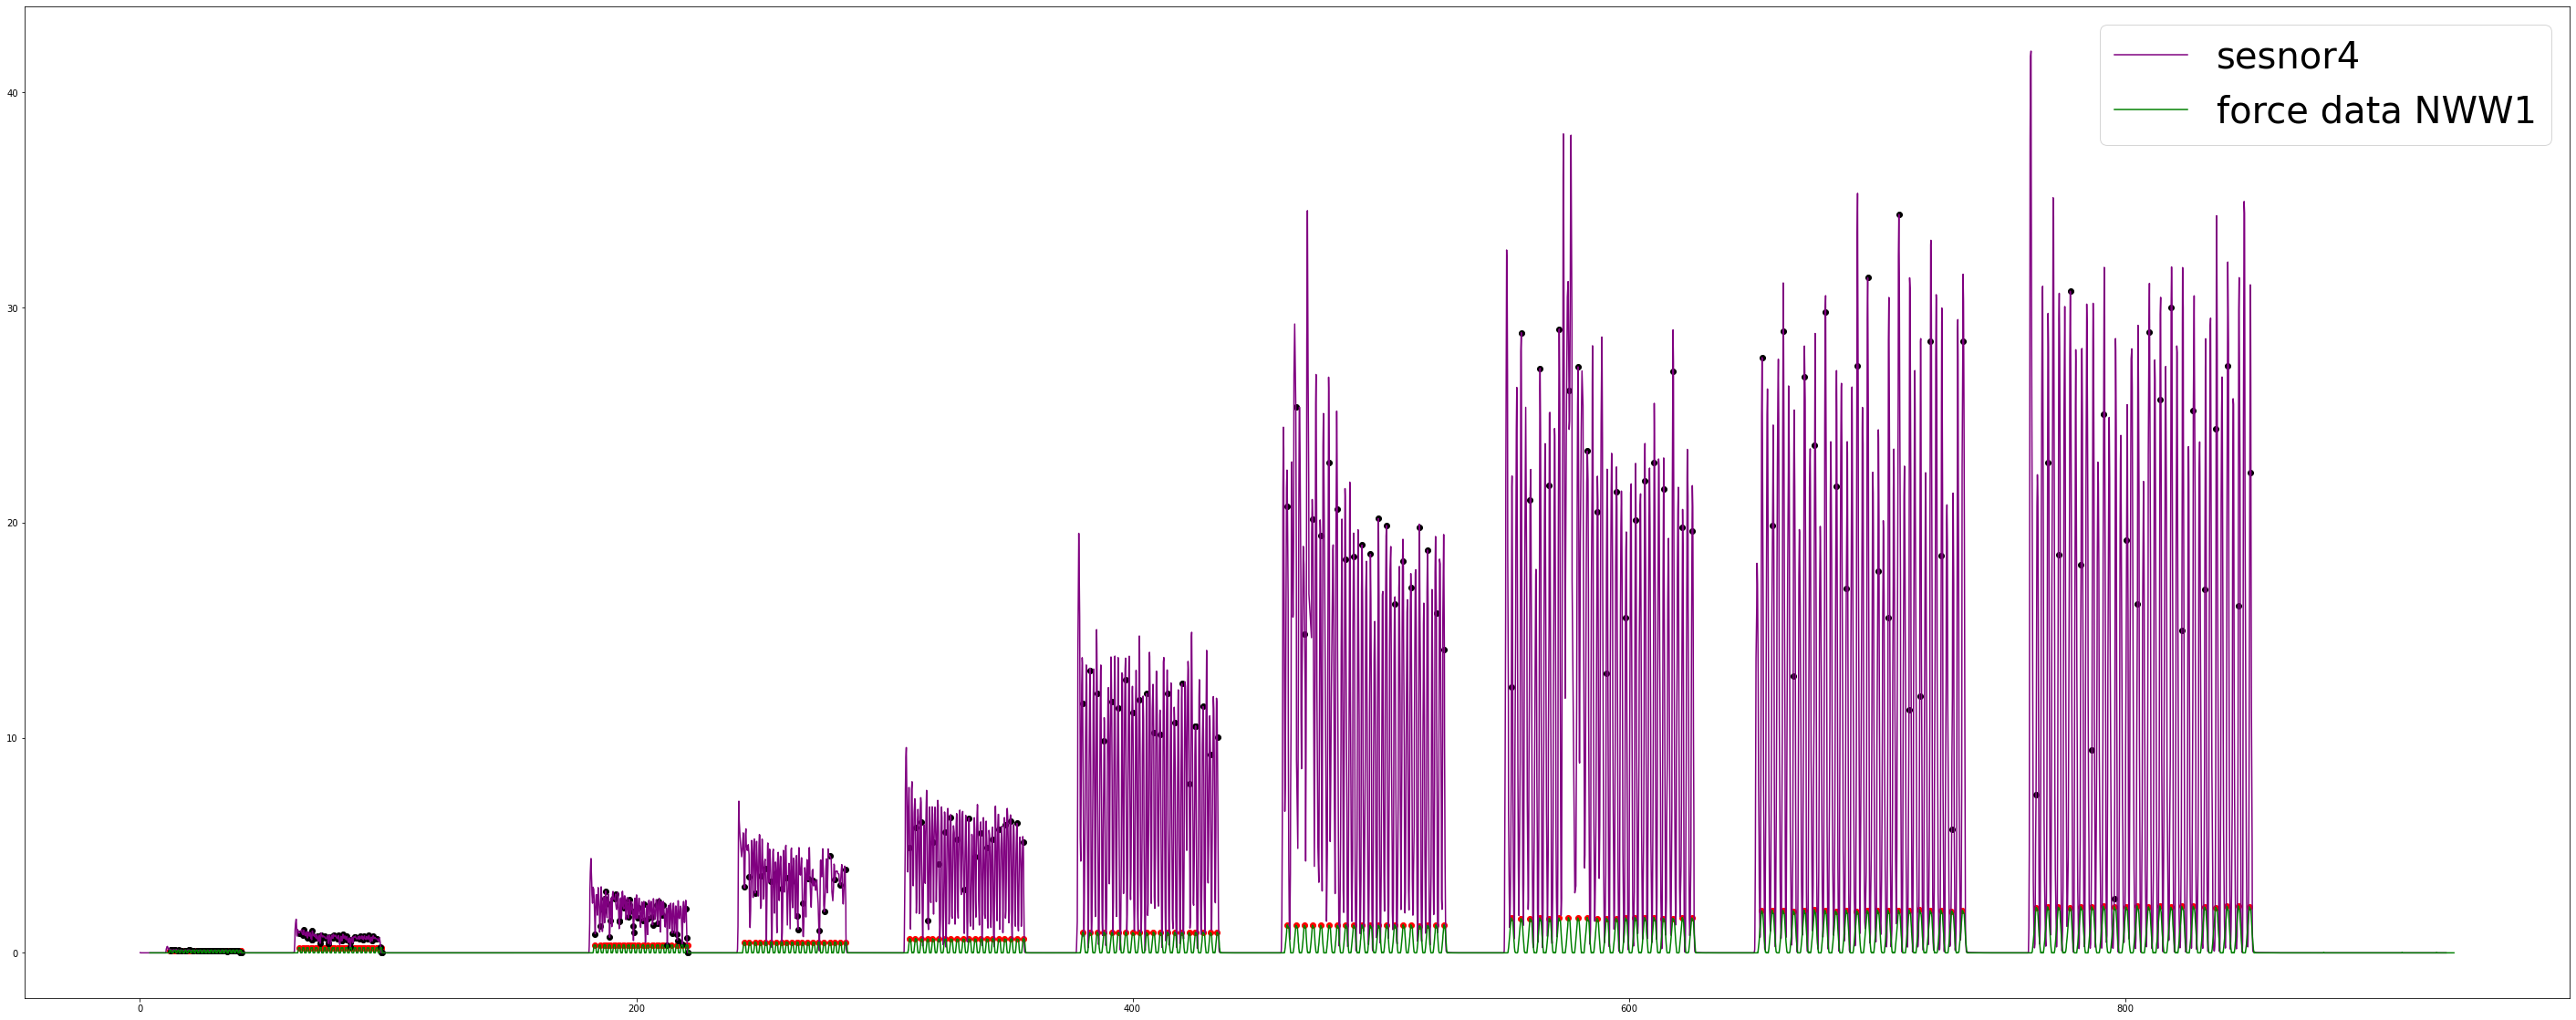

In [28]:
#visualizing the resistance data for each sensor NWW 1- 5 - NWW3

plt.figure(figsize=(50, 20))

# plt.plot(NWW3["Unnamed: 0"],NWW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NWW3["Unnamed: 0"],NWW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NWW3["Unnamed: 0"],NWW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NWW3["Unnamed: 0"],NWW3["s4_d"], color = 'purple', label = 'sesnor4')


scaled_x_force_NWW3 = x_force_NWW3 + 4
scaled_NWW3 = NWW3["Unnamed: 0"]

plt.plot(scaled_NWW3,NWW3["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NWW3,Load_NWW3,color = 'green', label = 'force data NWW1')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NWW3")

#finding the peaks

pidx_Load_NWW3, _ = find_peaks(Load_NWW3,prominence= 0.05 )
peaks_Load_NWW3 = Load_NWW3[pidx_Load_NWW3]
peaks_Ltime_NWW3 = scaled_x_force_NWW3[pidx_Load_NWW3]

plt.scatter(peaks_Ltime_NWW3,peaks_Load_NWW3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NWW3time = []

peaks_Ltime_NWW3.reset_index(drop = True, inplace = True)
peaks_Load_NWW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NWW3)):
    idx_NWW3time.append(bisect.bisect_left(NWW3["Unnamed: 0"], peaks_Ltime_NWW3[i]))

plt.scatter(NWW3["Unnamed: 0"][idx_NWW3time],NWW3["s4_d"][idx_NWW3time],color = 'black')

In [29]:
#Storing the peaks into csv file - NWW3
Load_NWW3peaks =[]

for i in range(len(peaks_Load_NWW3)):
    Load_NWW3peaks.append(peaks_Load_NWW3[i])
    
content_NWW3 = {'R1':NWW3["s1_d"][idx_NWW3time],
              'R2':NWW3["s2_d"][idx_NWW3time],
              'R3':NWW3["s3_d"][idx_NWW3time],
              'R4':NWW3["s4_d"][idx_NWW3time], 
              'Load': Load_NWW3peaks} 

df_NWW3 = pd.DataFrame(content_NWW3, columns = ['R1','R2','R3','R4','Load'])

df_NWW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NWW3.csv',index = False, header = True)

Sensor 4 is more profound for NWW4


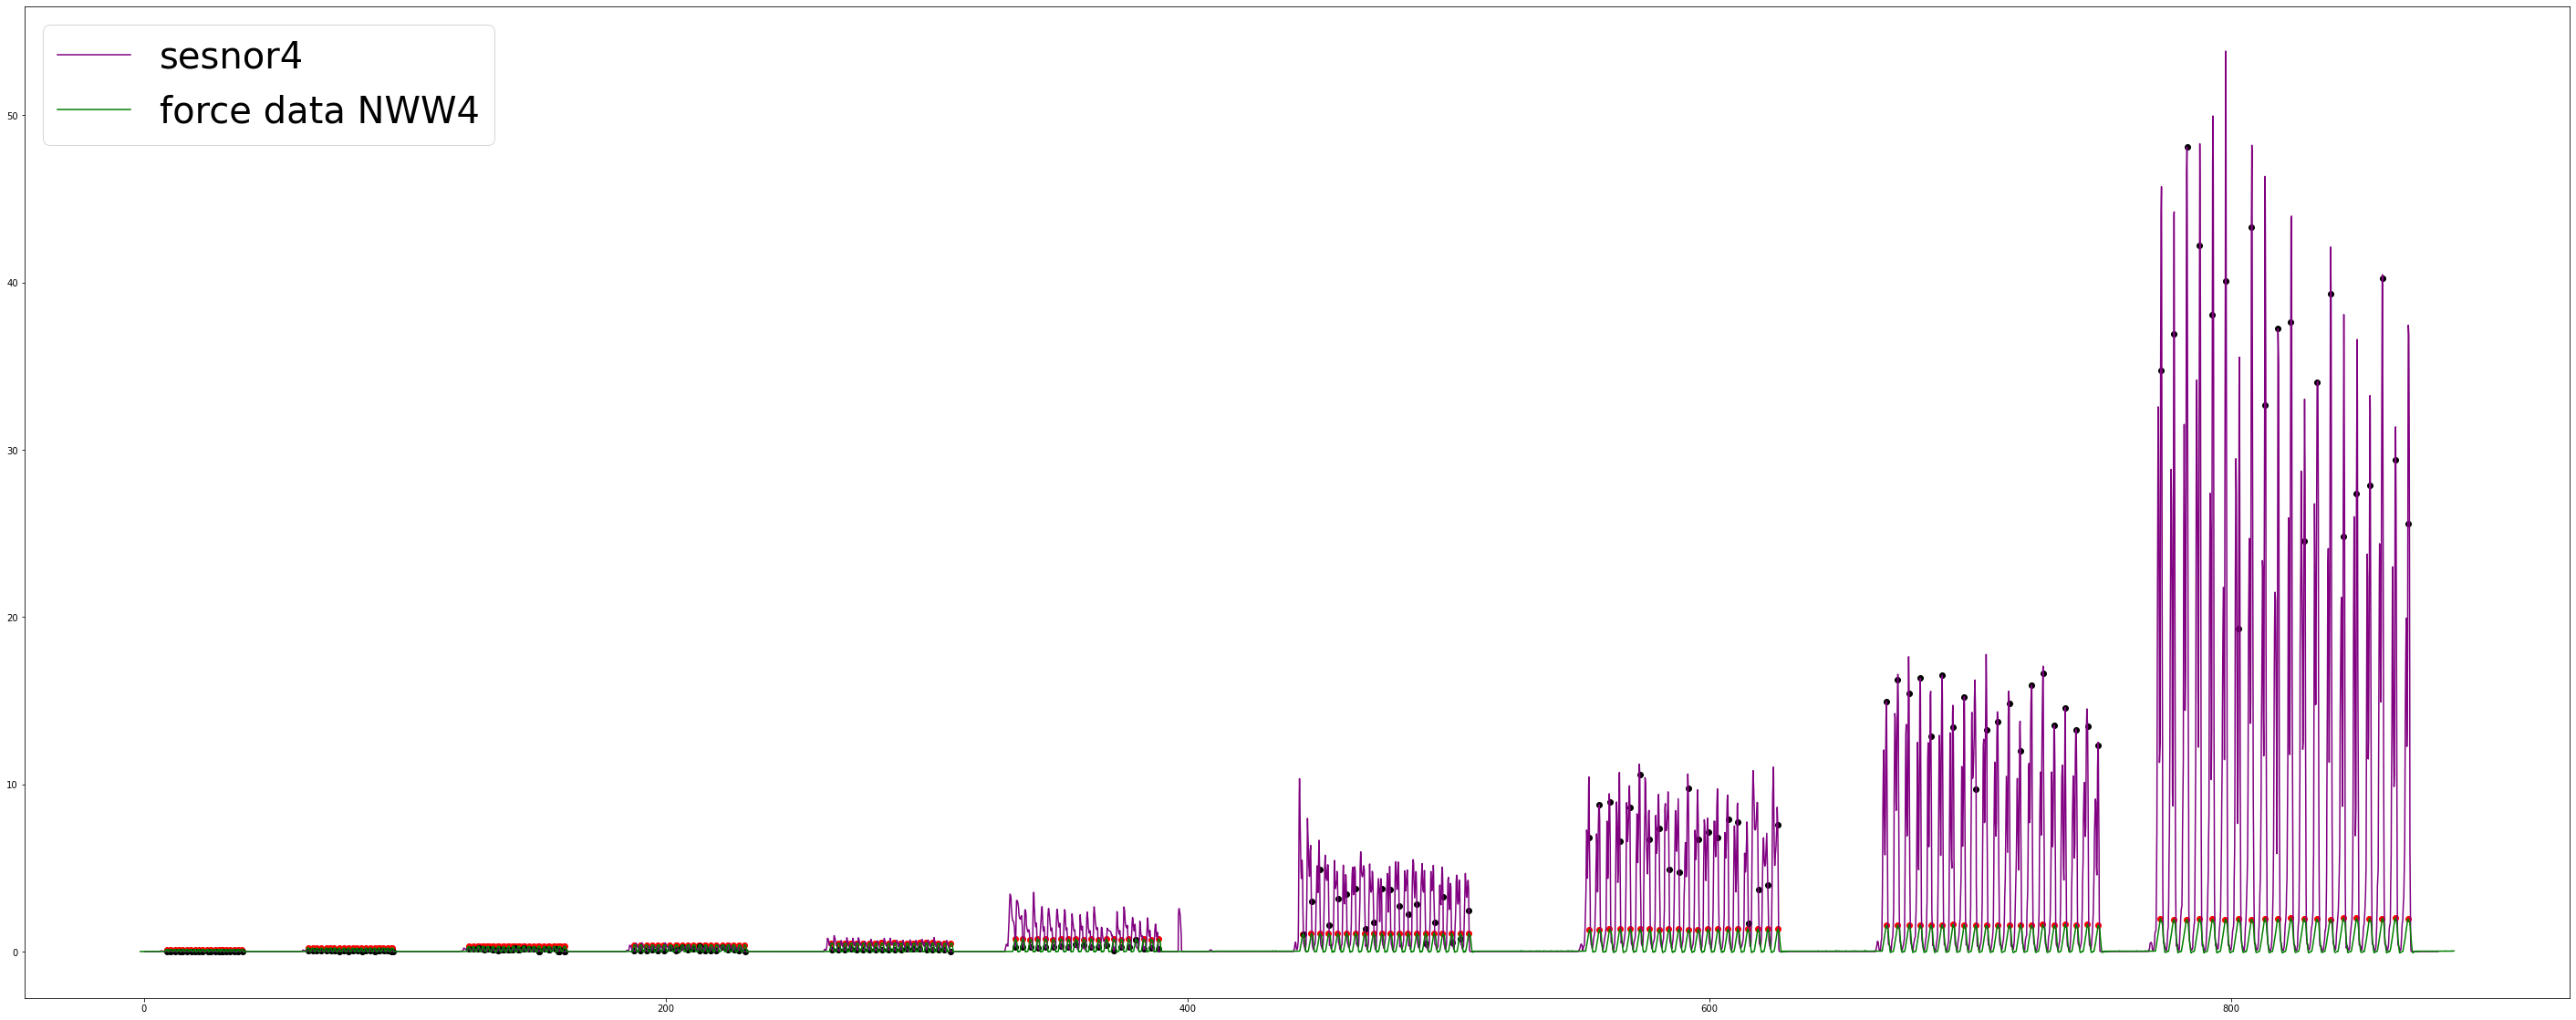

In [32]:
#visualizing the resistance data for each sensor NWW 1- 5 - NWW4

plt.figure(figsize=(50, 20))

# plt.plot(NWW1["Unnamed: 0"],NWW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s4_d"], color = 'purple', label = 'sesnor4')


scaled_x_force_NWW4 = x_force_NWW4 - 1.5
scaled_NWW4 = NWW4["Unnamed: 0"]

plt.plot(scaled_NWW4,NWW4["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NWW4,Load_NWW4,color = 'green', label = 'force data NWW4')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NWW4")

#finding the peaks

pidx_Load_NWW4, _ = find_peaks(Load_NWW4,prominence= 0.05 )
peaks_Load_NWW4 = Load_NWW4[pidx_Load_NWW4]
peaks_Ltime_NWW4 = scaled_x_force_NWW4[pidx_Load_NWW4]

plt.scatter(peaks_Ltime_NWW4,peaks_Load_NWW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NWW4time = []

peaks_Ltime_NWW4.reset_index(drop = True, inplace = True)
peaks_Load_NWW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NWW4)):
    idx_NWW4time.append(bisect.bisect_left(NWW4["Unnamed: 0"], peaks_Ltime_NWW4[i]))

plt.scatter(NWW4["Unnamed: 0"][idx_NWW4time],NWW4["s4_d"][idx_NWW4time],color = 'black')

In [33]:
#Storing the peaks into csv file - NWW4
Load_NWW4peaks =[]

for i in range(len(peaks_Load_NWW4)):
    Load_NWW4peaks.append(peaks_Load_NWW4[i])
    
content_NWW4 = {'R1':NWW4["s1_d"][idx_NWW4time],
              'R2':NWW4["s2_d"][idx_NWW4time],
              'R3':NWW4["s3_d"][idx_NWW4time],
              'R4':NWW4["s4_d"][idx_NWW4time], 
              'Load': Load_NWW4peaks} 

df_NWW4 = pd.DataFrame(content_NWW4, columns = ['R1','R2','R3','R4','Load'])

df_NWW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NWW4.csv',index = False, header = True)

Sensor 4 is more profound for NWW5


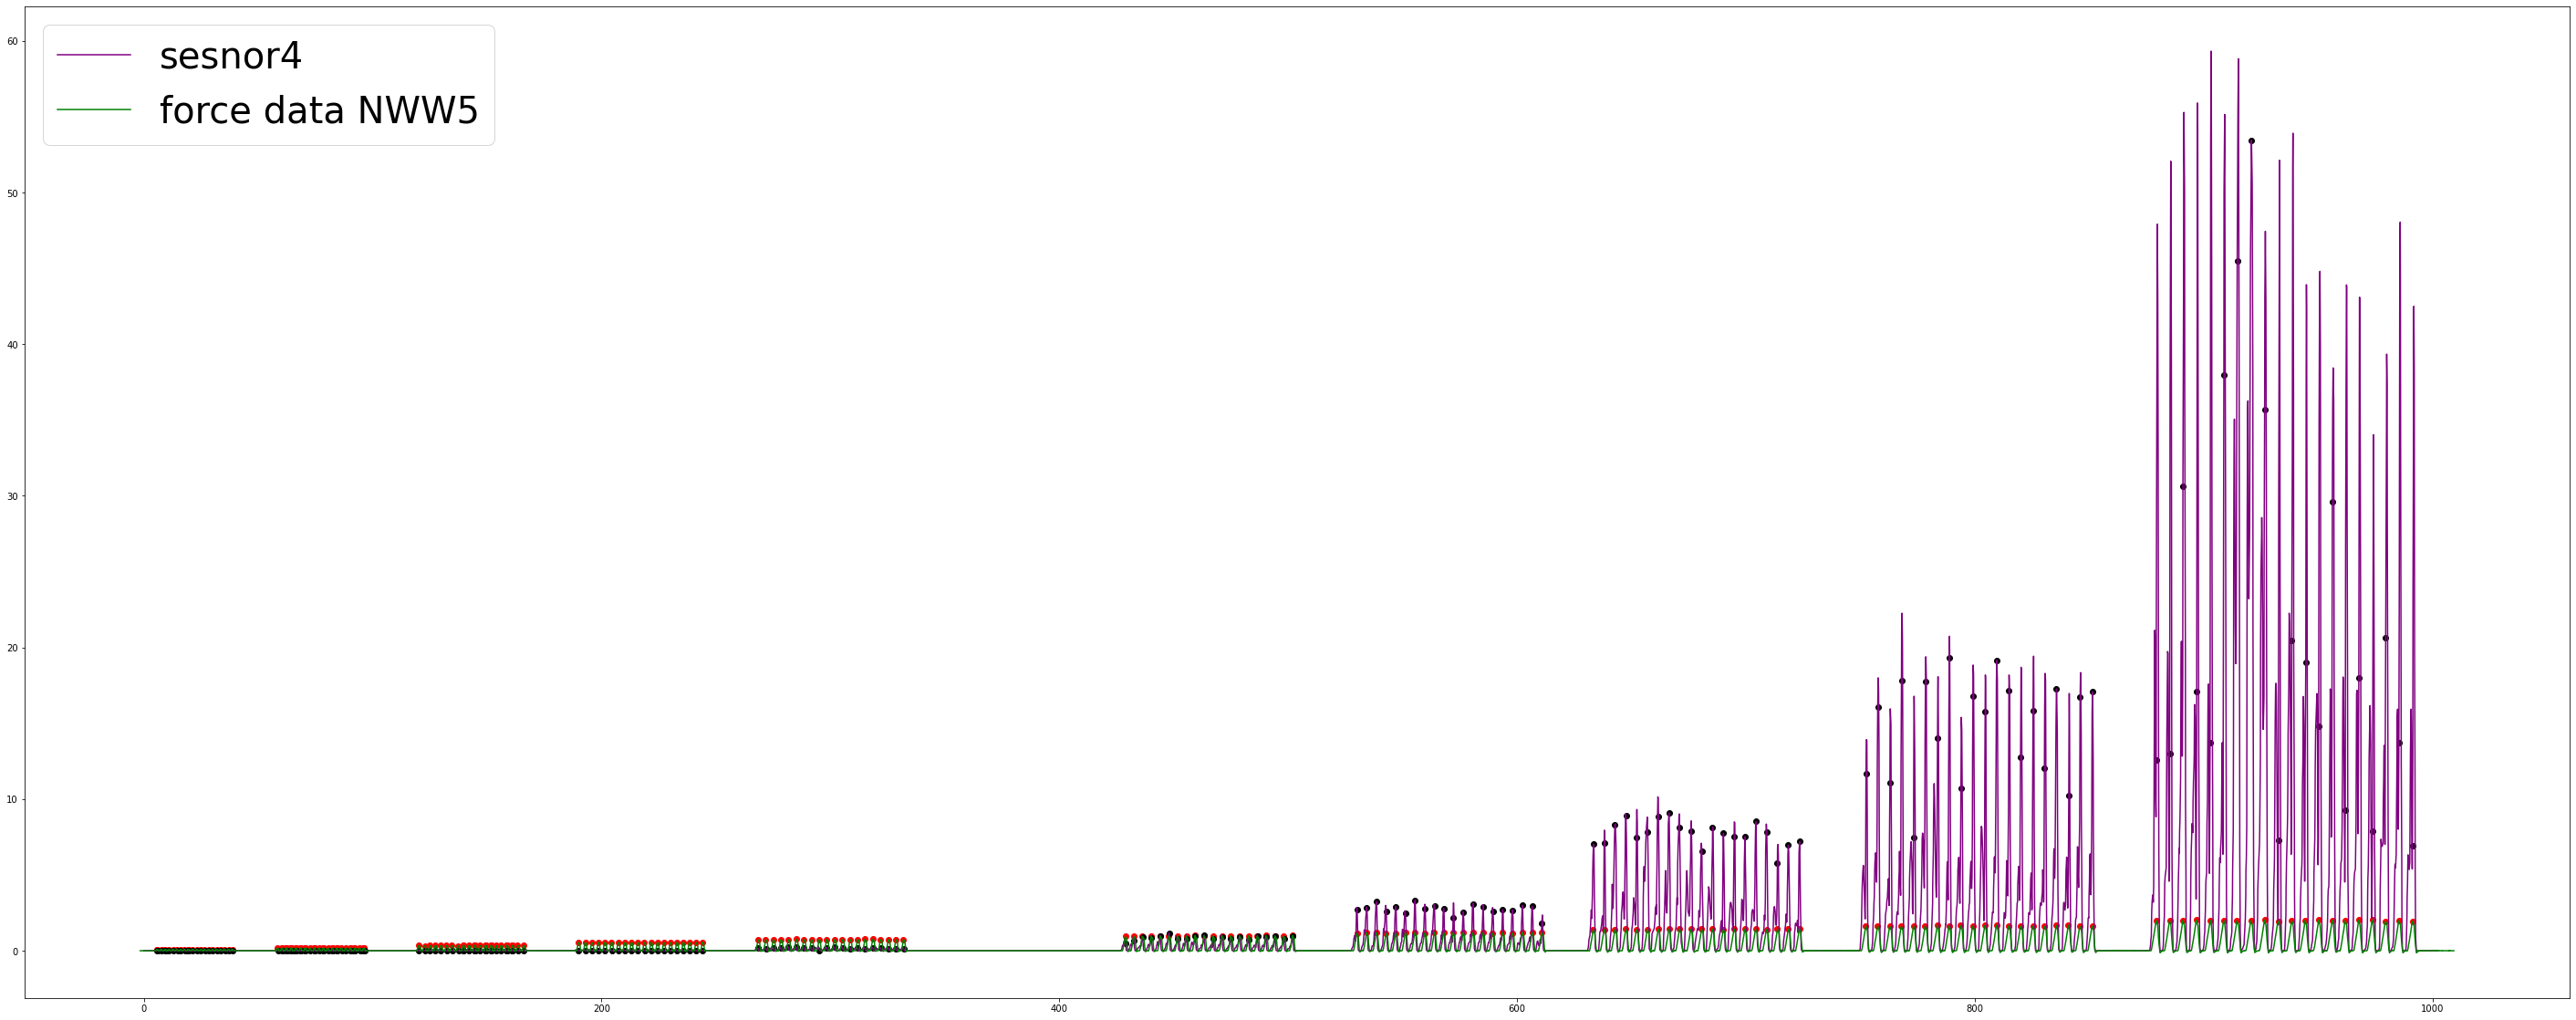

In [38]:
#visualizing the resistance data for each sensor NWW 1- 5 - NWW5

plt.figure(figsize=(50, 20))

# plt.plot(NWW1["Unnamed: 0"],NWW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NWW1["Unnamed: 0"],NWW1["s4_d"], color = 'purple', label = 'sesnor4')


scaled_x_force_NWW5 = x_force_NWW5 - 1.5
scaled_NWW5 = NWW5["Unnamed: 0"]

plt.plot(scaled_NWW5,NWW5["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NWW5,Load_NWW5,color = 'green', label = 'force data NWW5')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NWW5")

#finding the peaks

pidx_Load_NWW5, _ = find_peaks(Load_NWW5,prominence= 0.05 )
peaks_Load_NWW5 = Load_NWW5[pidx_Load_NWW5]
peaks_Ltime_NWW5 = scaled_x_force_NWW5[pidx_Load_NWW5]

plt.scatter(peaks_Ltime_NWW5,peaks_Load_NWW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NWW5time = []

peaks_Ltime_NWW5.reset_index(drop = True, inplace = True)
peaks_Load_NWW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NWW5)):
    idx_NWW5time.append(bisect.bisect_left(NWW5["Unnamed: 0"], peaks_Ltime_NWW5[i]))

plt.scatter(NWW5["Unnamed: 0"][idx_NWW5time],NWW5["s4_d"][idx_NWW5time],color = 'black')

In [39]:
#Storing the peaks into csv file - NWW5
Load_NWW5peaks =[]

for i in range(len(peaks_Load_NWW5)):
    Load_NWW5peaks.append(peaks_Load_NWW5[i])
    
content_NWW5 = {'R1':NWW5["s1_d"][idx_NWW5time],
              'R2':NWW5["s2_d"][idx_NWW5time],
              'R3':NWW5["s3_d"][idx_NWW5time],
              'R4':NWW5["s4_d"][idx_NWW5time], 
              'Load': Load_NWW5peaks} 

df_NWW5 = pd.DataFrame(content_NWW5, columns = ['R1','R2','R3','R4','Load'])

df_NWW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NWW5.csv',index = False, header = True)